# Basic Image Processing - Concepts

Simple examples of image processing concepts on OpenCV. Concepts explored:

* Data structures
* Color conversions
* Image operation
* Thresholding and masking
* Blurring
* Contours and bounding rectangles
* Edges
* Hough Transforms

In [8]:
import warnings
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#from __future__ import print_function
warnings.filterwarnings('ignore')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['figure.figsize'] = (14,6)

## Basic Image structure in OpenCV

In [9]:
# read an RGB image. 
import cv2
img = cv2.imread('images/lenaColor.png',cv2.IMREAD_UNCHANGED)

# show image format (basically a 3-d array of pixel color info, in BGR format)
print("Image Shape: ",img.shape)
print("Image Size: ", img.size)
print("Image Type: ", img.dtype)
print("\n=================================================\n")

#Pixel at row 1, col 1 
print("Pixel at Row:1 Col:1", img[1,1])
#acesssing only Blue color at  Pixel [1,1]
print("Blue value of Pixel [1,1]", img[1,1,0])
print("Blue value of Pixel [1,1]", img.item(1,1,0))

print ("\nBlue Channel vector of image:\n", img[:,:,0])
print("\n=================================================\n")
print(img)


Image Shape:  (512, 512, 3)
Image Size:  786432
Image Type:  uint8


Pixel at Row:1 Col:1 [125 137 226]
Blue value of Pixel [1,1] 125
Blue value of Pixel [1,1] 125

Blue Channel vector of image:
 [[125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 [125 125 133 ... 122 110  90]
 ...
 [ 60  60  58 ...  84  76  79]
 [ 57  57  62 ...  79  81  81]
 [ 57  57  62 ...  79  81  81]]


[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181

## Changing alpha level of RGBA image

You can change alpha level of an image to manage its transperency

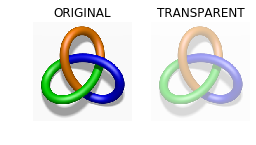

In [23]:
# read an image
img = cv2.imread('images/triColor.png',cv2.IMREAD_UNCHANGED)

# show image format (basically a 3-d array of pixel color info, in BGR format)
print("Image Shape: ",img.shape)
print("Image Size: ", img.size)
print("Image Type: ", img.dtype)

b_channel, g_channel, r_channel, alpha_channel = cv2.split(img)
def drawFunction(x):
    alpha_channel[:] = x
    img_BGRA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))
    plt.subplot(131),plt.imshow(img),plt.title('ORIGINAL'),plt.axis("Off")
    plt.subplot(132),plt.imshow(img_BGRA),plt.title('TRANSPARENT'),plt.axis("Off")

slider = widgets.IntSlider(min=0, max=255, step=5, value=100)
interact(drawFunction, x=slider);

### Colors and color conversions

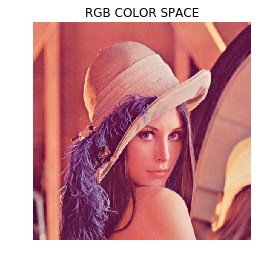

In [11]:
img = cv2.imread('images/lenaColor.png',cv2.IMREAD_UNCHANGED)

# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.title('RGB COLOR SPACE'),plt.axis("Off")
plt.imshow(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


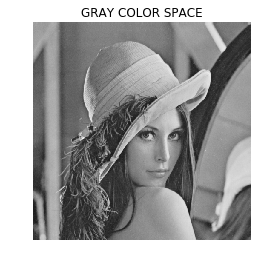

In [12]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

plt.title('GRAY COLOR SPACE'),plt.axis("Off")
plt.imshow(gray_img, cmap=cm.gray, vmin=0, vmax=255)

### Finding the average color of an image

In [13]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[180  99 105]


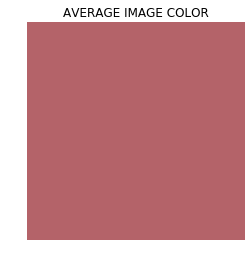

In [14]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.title('AVERAGE IMAGE COLOR'),plt.axis("Off")
plt.imshow(average_color_img)

## Histogram

Histogram is a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image.

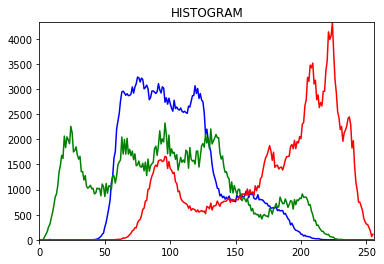

In [15]:
img = cv2.imread('images/lenaColor.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.title('HISTOGRAM')
plt.show()

## Image ROI

Sometimes, you will have to play with certain region of images. As an example - For eye detection in images, first face detection is done all over the image and when face is obtained, we select the face region alone and search for eyes inside it instead of searching whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area)


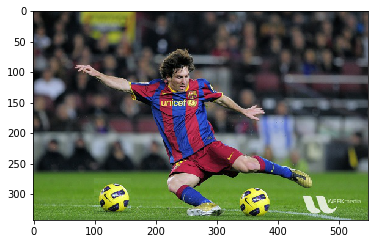

In [16]:
img = cv2.imread('images/messi.jpg')
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

# show image with matplotlib
plt.imshow(img)

# Arithmatic operation on Images
Several arithmetic operations on images like addition, subtraction, bitwise operations etc.cv2.add(),cv2.addWeighted() ,etc.

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in next notebook), defining and working with non-rectangular ROI etc. 

## Image Addition / Blending

You can add two images by OpenCV function, cv2.add().
Both images should be of same depth and type, or second image can just be a scalar value.

Image Blending is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency. Images are added as per the equation below:

                    g(x)=(1−α)f0(x)+αf1(x)
                    
By varying α from 0→1, you can perform a cool transition between one image to another.

Here I took two images to blend them together. First image is given a weight based on slider value and second image is given (1 - slider Value). cv2.addWeighted() applies following equation on the image.

                    dst=α⋅img1+β⋅img2+γ
                    
Here γ constant scalar added to each pixel and is taken as zero.



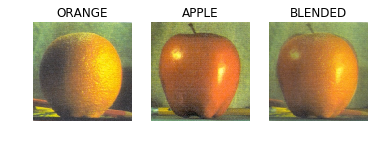

In [17]:
img1 = cv2.imread('images/orange.png')
# convert image to RGB color for matplotlib
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('images/apple.png')
# convert image to RGB color for matplotlib
img2 = cv2.cvtColor(img2, cv2.COLOR_BGRA2RGB)

def drawFunction(x):
    y = 1-x
    dst = cv2.addWeighted(img1,x,img2,y,0)
    plt.subplot(131),plt.imshow(img1),plt.title('ORANGE'),plt.axis("Off")
    plt.subplot(132),plt.imshow(img2),plt.title('APPLE'),plt.axis("off")
    plt.subplot(133),plt.imshow(dst),plt.title('BLENDED'),plt.axis("off")
    

slider = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.5)
interact(drawFunction, x=slider);

In [11]:
print('The end!')

The end!
